In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pandas as pd
from os import path
from scipy.cluster.hierarchy import dendrogram, linkage 

fig_size = plots.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plots.rcParams["figure.figsize"] = fig_size

### Data Cleaning Function

load_data function loads an excel sheet into a dataframe and cleans it to remove 

In [2]:
def load_data(excel_file, sheet_name):
    '''
    Reads in the excel file and processes it

    Inputs:
        excel_file (string): path to the excel file
        sheet_name (string): the name of the sheet you want to work on

    Returns
        A pandas dataframe
    '''
    
    if not path.exists(excel_file):
        print('The file could not be found, please try again')
        return None

    dtype_dict = {'Payment Amount':float, 'Fees and Costs':float, "City Department Involved":str}
    df = pd.read_excel(excel_file, sheet_name=sheet_name, dtype=dtype_dict)
    
    df["City Department Involved"] = df["City Department Involved"].str.strip()
    df["City Department Involved"] = df["City Department Involved"].str.replace(u'\xa0', u' ')
    df["Primary Cause"] = df["Primary Cause"].str.replace(u'\xa0', u' ')
    df["Primary Cause"] = df["Primary Cause"].str.strip()
    
    df['Disposition'] = df['Disposition'].str.replace(u'\xa0', u' ')
    df['Disposition'] = df['Disposition'].str.strip()    
    
    #Seperates month and year column
    df["Date to Comptroller"] = pd.to_datetime(df["Date to Comptroller"])
    df["Year to Comptroller"] = df["Date to Comptroller"].dt.year
    df["Month to Comptroller"] = df["Date to Comptroller"].dt.month
    
    #df.fillna('MISSING', inplace=True)
    df.Tort.replace('YES', True, inplace=True)
    df.Tort.replace('NO', False, inplace=True)
    df.Tort.replace('NA', np.NaN, inplace=True)
    
    #Fixes mispellings in city department
    df['City Department Involved'].replace('FLEET MANAEMENT', 'FLEET MANAGEMENT', inplace=True)
    
    df['Disposition'].replace('OFFER OF JDGMT', 'OFFER OF JUDGMENT', inplace=True)
    
    df['Payment Amount(millions)'] = df['Payment Amount'] / 1000000
    df['Fees and Costs(millions)'] = df['Fees and Costs'] / 1000000
    df['Total Paid'] = df['Fees and Costs'] + df['Payment Amount']
    df['Total Paid(millions)'] = df['Total Paid'] / 1000000
    
    return df

def check_mva(string):
    if 'MVA' in string:
        return True
    else:
        return False
    

In [3]:
#Dictionary Map for Reducing the Primary cause catagories for police lawsuits
Causes = {
    "False Arrest":['FALSE ARREST'],
    "Excessive Force": ['EXCESSIVE FORCE/MINOR', 'EXCESSIVE FORCE', 'EXCESSIVE FORCE/SERIOUS','FALSE ARREST/EXCESSIVE FORCE'\
                       ,'EXCESSIVE FORCE/TASER'],
    "MVA/Property Damage": ['MVA/CITY VEHICLE', 'MVA - PROPERTY DAMAGE ONLY', 'DAMAGE TO PROPERTY DURING OPERATIONS',\
           'PROPERTY DAMAGE/MVA','MVA - CITY VEHICLE','STRUCK WHILE PARKED','SIDESWIPE COLLISION',\
           'MVA/ER-POLICE', 'INTER ACCIDENT-OUR UNIT STRAIGHT AHEAD','REAR-ENDED CLAIMANT',\
           'MVA/PEDESTRIAN','BACKING OR ROLLING BACK','MVA/PROPERTY DAMAGE','PURSUIT/OFFENDER ACCIDENT',\
            'CPD V BACKED INTO CL VEH FRONT RIGHT DAMAGE CL VEH SCHNEIDER KATHY',\
            'CPD VEH HIT CL VEH UNSPECIFIED VEH DAMAGE MENDEZ JEANNE R',\
            'CPD V HIT CL PARKED VEH LEFT SIDE DAMAGE CL VEH HIGGS MARIA',\
            'CPD HIT CL VEH IN REAR REAR END DAMAGE CL VEH TIRADO GLORIA',\
            'CPD V HIT CL VEH LEFT SIDE DAMAGE CL VEH',\
            'CPD PUSH V INTO CL VEH LEFT SIDE DAMAGE CL VEH SCHOESSLING JOHN',\
            'CPD RESCUE-CL BOAT DMGD GASH IN CL BOAT/DMG ANCHR',\
            'CL VEH HIT CPD VEH FRONT END DMG CL VEH BOKUNIEWICZ JOSEPH',\
            'CPD VEH REARENDED CL VEH UNDISCLOSED INJURIES FLAHERTY KENNETH W','HEAD ON  COLLISION',\
            'CPD PURSUIT 3 BROKEN WINDOWS', 'INTERSECTION COLLISION',\
            'CPD B/INTO CL PARKED VEH MINOR SCRATCHES FRONT END UNKN UNKN',\
            'INTER ACCIDENT-OUR UNIT TURNING LEFT','VEHICLE COLLISION - CITY VEHICLE','PROPERTY DAMAGE - OTHER',\
            'PROPERTY DAMAGED DURING OPERATIONS', 'BICYCLE ACCIDENTS','COLLIDED WITH FIXED OBJECT','MVA - PEDESTRIAN',\
            'MVA/ER - POLICE', 'PROPERTY DAMAGE - OTHER', 'PROPERTY DAMAGED DURING OPERATIONS','PROPERTY DAMAGE/OTHER',\
            'CLAIMANT HIT FOREIGN OBJECT ON ROAD', 'CLAIMANT REAR-ENDED OUR UNIT','VEHICLE DAMAGE/LOSS POUND',\
            'PURSUIT - OFFENDER ACCIDENT','MVA - PROPERTY DAMAGE BIKE','PASSING AND TURNING ACCIDENT','PURSUIT OFFENDER ACCIDENT',\
            'PURSUIT/SQUAD ACCIDENT','CPDSA'],
    "Illegal Search/Seizure": ['ILLEGAL SEARCH/SEIZURE', 'ILLEGAL SEARCH & SEIZURE'],
    "Extended Detention/Malicious Prosecution": ['EXTENDED DETENTION/MALICIOUS PROSECUTION','EXCESSIVE FORCE/MALICIOUS PROSECUTION'],
    'Burge-Related': ['EXCESSIVE FORCE/SERIOUS/BURGE REPARATIONS','BURGE REPARATIONS']
}

CAUSE_MAP = {m:k for k, v in Causes.items() for m in v}

### Loading Data for each Year

This loads a dataframe for each year

In [4]:
#Loads in dataframes for each year
df_2008 = load_data("2008_Payments.xlsx", "Payments")
df_2009 = load_data("2009_Payments.xlsx", "Payments")
df_2010 = load_data("2010_Payments.xlsx", "Payments")
df_2011 = load_data("2011_Payments.xlsx", "Payments")
df_2012 = load_data("2012_Payments.xlsx", "Payments")
df_2013 = load_data("2013_Payments.xlsx", "Payments")
df_2014 = load_data("2014_Payments.xlsx", "Payments")
df_2015 = load_data("2015_Payments.xlsx", "Payments")
df_2016 = load_data("2016_Payments.xlsx", "Payments")
df_2017 = load_data("2017_Payments.xlsx", "Payments")
df_2018 = load_data("2018_Payments.xlsx", "Payments")
#In 2018 they put 0931 at each city department so this just removes it
df_2018["City Department Involved"] = df_2018["City Department Involved"].str.replace(' 0931', '')

### Making the Big Dataframe

This appends all the datasets together and restricts it to police

In [5]:
# Makes a dataframe for every year
df_total = df_2008.append(df_2009, ignore_index=True, sort=False)
df_total = df_total.append(df_2010, ignore_index=True, sort=False)
df_total = df_total.append(df_2011, ignore_index=True, sort=False)
df_total = df_total.append(df_2012, ignore_index=True, sort=False)
df_total = df_total.append(df_2013, ignore_index=True, sort=False)
df_total = df_total.append(df_2014, ignore_index=True, sort=False)
df_total = df_total.append(df_2015, ignore_index=True, sort=False)
df_total = df_total.append(df_2016, ignore_index=True, sort=False)
df_total = df_total.append(df_2017, ignore_index=True, sort=False)
df_total = df_total.append(df_2018, ignore_index=True, sort=False)

### Saving the big datafram

This saves the big dataframe as one excel sheet

In [6]:
df_total.to_excel("All_Settlements_08_to_18.xlsx")

### Making the Police Dataframe

This restrict it to only police lawsuits

In [7]:
police_total = df_total[df_total['City Department Involved'] == 'POLICE']
police_total['Main Cause'] = police_total['Primary Cause'].map(CAUSE_MAP).copy(deep=True)
police_total['Main Cause'].fillna('Other', inplace=True)

#Dataframe of only Moter Vehicle Accident suits
police_total_MVA= police_total[police_total['Main Cause'] == 'MVA/Property Damage']
#Dataframe of only non-Moter Vehicle Accident suits
police_total_nonMVA= police_total[police_total['Main Cause'] != 'MVA/Property Damage']
police_total['Primary Cause'].nunique()

/Users/philiposullivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/philiposullivan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


226

### Exporting Police Settlement Dataframe
This saves the big police dataframe as one excel sheet

In [8]:
police_total.to_excel("Police_Settlements_08_to_18.xlsx")

### Exploring the Data
General Information

In [7]:
print('Statistics for all lawsuits')
print(police_total['Total Paid(millions)'].describe())
print(police_total['Total Paid'].sum())

Statistics for all lawsuits
count    4768.000000
mean        0.132623
std         0.733499
min        -1.500000
25%         0.002235
50%         0.007603
75%         0.040000
max        20.923883
Name: Total Paid(millions), dtype: float64
632348067.5999999


In [8]:
#groups by year then sums
police_sum_by_year = police_total.groupby('Year to Comptroller').sum()
police_sum_by_year['Year'] = police_sum_by_year.index
police_sum_by_year['Year'] = police_sum_by_year['Year'].astype('int64')
#groups by year then counts
police_count_by_year = police_total.groupby('Year to Comptroller').count()
police_count_by_year['Year'] = police_count_by_year.index
police_count_by_year['Year'] = police_count_by_year['Year'].astype('int64')


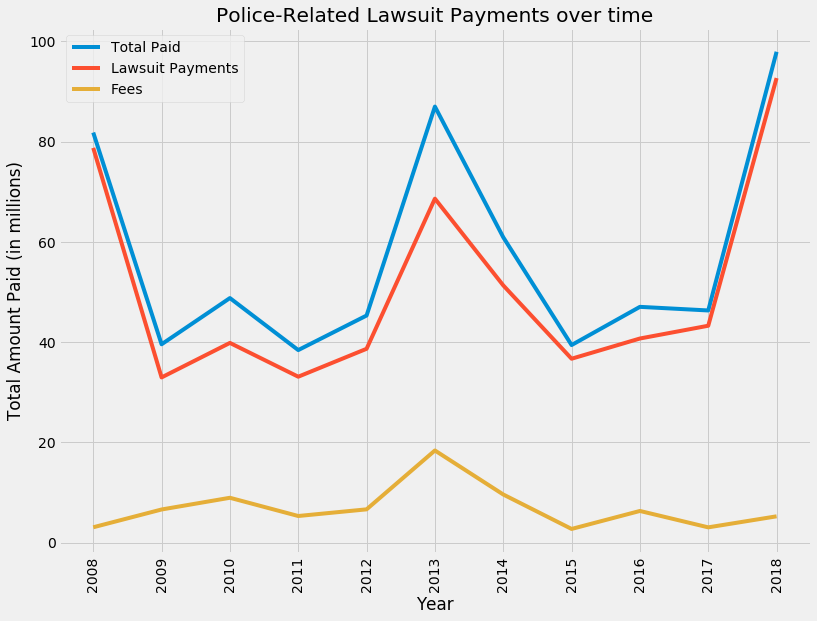

In [9]:
plots.plot(police_sum_by_year['Year'], police_sum_by_year['Total Paid(millions)'])
plots.plot(police_sum_by_year['Year'], police_sum_by_year['Payment Amount(millions)'])
plots.plot(police_sum_by_year['Year'], police_sum_by_year['Fees and Costs(millions)'])
plots.xticks(np.arange(2008, 2019, step=1))
plots.xticks(rotation = 90)
plots.xlabel('Year')
plots.ylabel('Total Amount Paid (in millions)')
plots.title('Police-Related Lawsuit Payments over time')
plots.legend(loc = 'upper left')
mylabels = ['Total Paid', 'Lawsuit Payments', 'Fees']
plots.legend(labels=mylabels)

Text(0,0.5,'Total Lawsuits per Year')

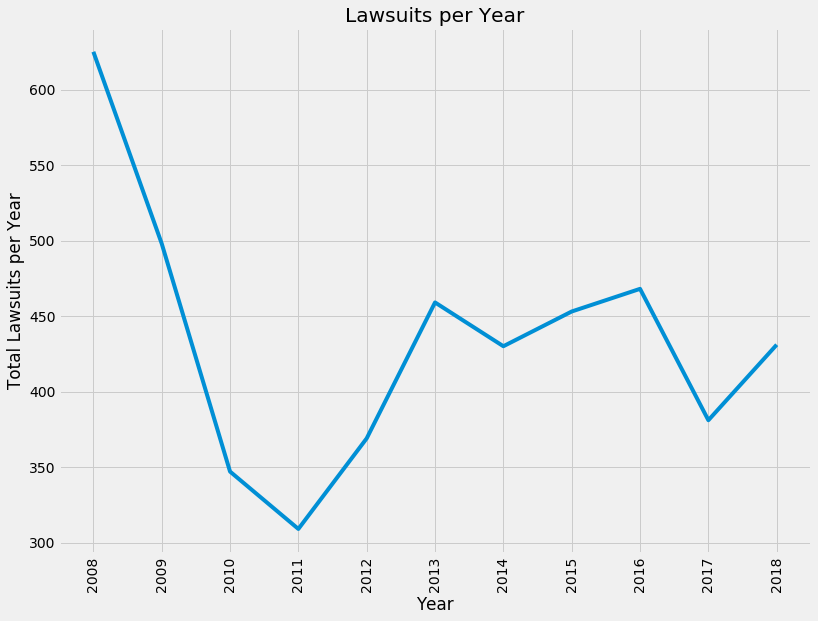

In [10]:
plots.plot(police_count_by_year['Year'], police_count_by_year['Payee'])


plots.xticks(np.arange(2008, 2019, step=1))
#plots.yticks(np.arange(.25, 1, step=.25))
plots.xticks(rotation = 90)
plots.title('Lawsuits per Year')
plots.xlabel('Year')
plots.ylabel('Total Lawsuits per Year')

C:\Users\phili\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(1900,-0.1,'MVA/Property Damage')

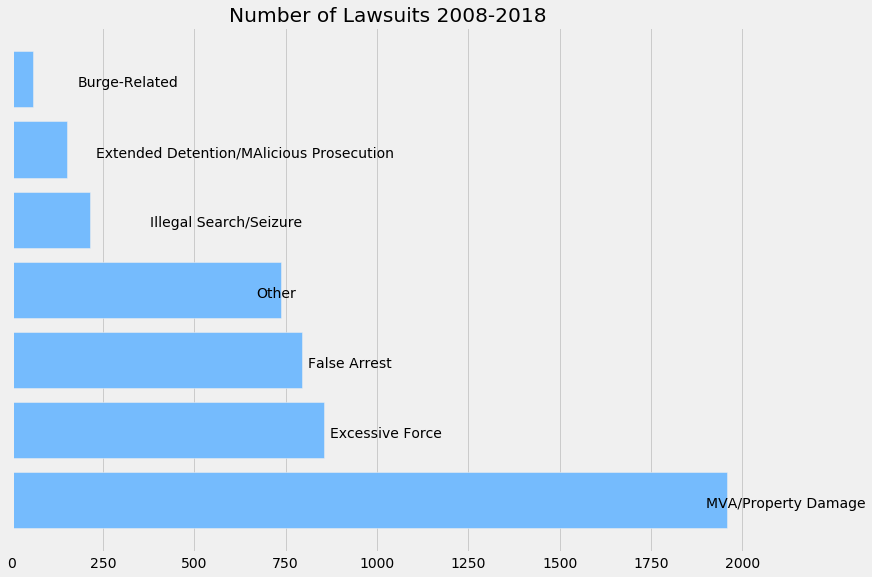

In [24]:
plots.title('Number of Lawsuits 2008-2018')
plots.barh(police_total['Main Cause'].value_counts().index,police_total['Main Cause'].value_counts(),color="xkcd:sky blue")
ay1 = plots.axes()
y_axis = ay1.axes.get_yaxis()
y_axis.set_visible(False)
plots.text(180,5.9, 'Burge-Related')
plots.text(230,4.9, 'Extended Detention/MAlicious Prosecution')
plots.text(380,3.9,'Illegal Search/Seizure')
plots.text(670,2.9,'Other')
plots.text(810,1.9,'False Arrest')
plots.text(870,0.9,'Excessive Force')
plots.text(1900,-0.1,'MVA/Property Damage')

(0, 0.1)

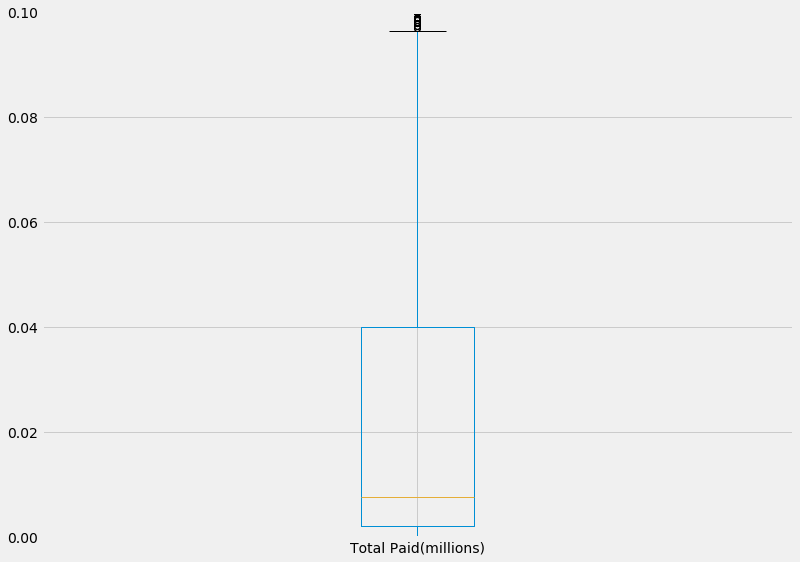

In [12]:
police_total.boxplot(column=['Total Paid(millions)'])
plots.ylim(0, .1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022626A3D0B8>]],
      dtype=object)

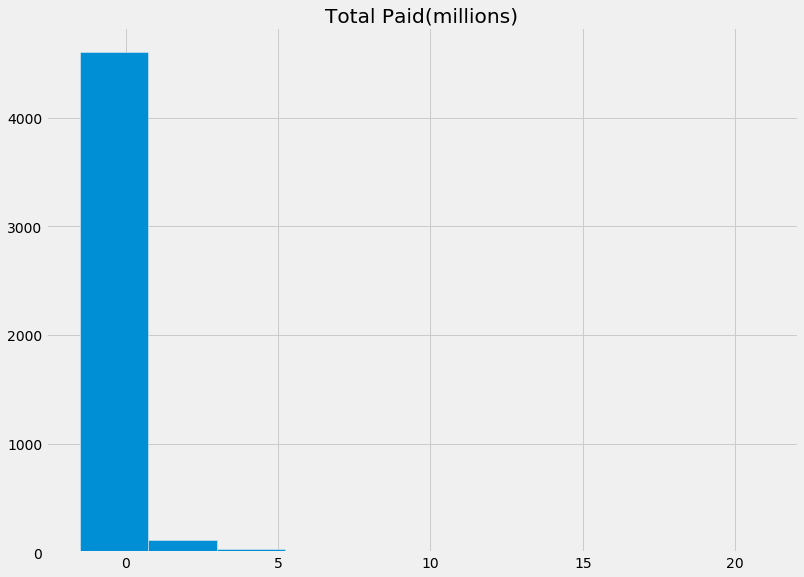

In [13]:
police_total.hist(column=['Total Paid(millions)'])#, bins=20, range=(0,0.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022626955B00>]],
      dtype=object)

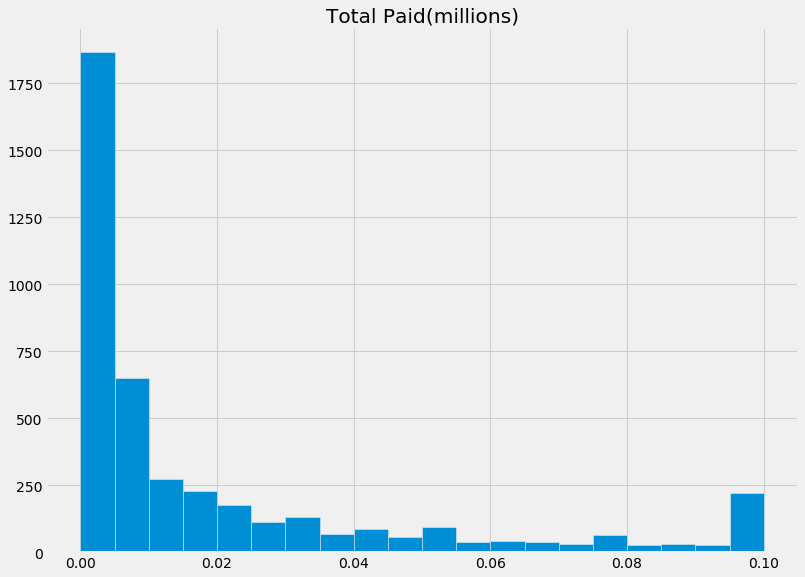

In [14]:
police_total.hist(column=['Total Paid(millions)'], bins=20, range=(0,0.1))

### Exploring MVA versus non-MVA Cases

In [15]:
#General statistics on all lawsuits and then MVA vs non-MVA
print('Statistics for all lawsuits')
print(police_total['Total Paid(millions)'].describe())
print('\nStatistics for MVA lawsuits')
print(police_total_MVA['Total Paid(millions)'].describe())
print('\nStatistics for Non-MVA lawsuits')
print(police_total_nonMVA['Total Paid(millions)'].describe())

Statistics for all lawsuits
count    4768.000000
mean        0.132623
std         0.733499
min        -1.500000
25%         0.002235
50%         0.007603
75%         0.040000
max        20.923883
Name: Total Paid(millions), dtype: float64

Statistics for MVA lawsuits
count    1958.000000
mean        0.043607
std         0.536650
min        -0.006122
25%         0.001170
50%         0.002389
75%         0.005349
max        20.923883
Name: Total Paid(millions), dtype: float64

Statistics for Non-MVA lawsuits
count    2810.00000
mean        0.19465
std         0.83847
min        -1.50000
25%         0.00700
50%         0.02400
75%         0.08000
max        16.00000
Name: Total Paid(millions), dtype: float64


In [16]:
#sums for MVA
policeMVA_sum_by_year = police_total_MVA.groupby('Year to Comptroller').sum()
policeMVA_sum_by_year['Year'] = policeMVA_sum_by_year.index
policeMVA_sum_by_year['Year'] = policeMVA_sum_by_year['Year'].astype('int64')
#sums for non-MVA
policenonMVA_sum_by_year = police_total_nonMVA.groupby('Year to Comptroller').sum()
policenonMVA_sum_by_year['Year'] = policenonMVA_sum_by_year.index
policenonMVA_sum_by_year['Year'] = policenonMVA_sum_by_year['Year'].astype('int64')

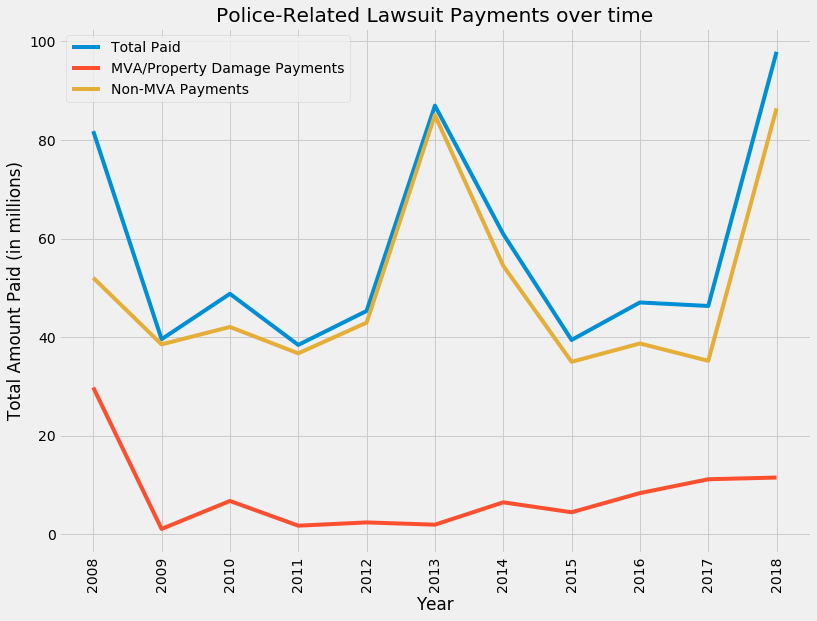

In [17]:
plots.plot(police_sum_by_year['Year'], police_sum_by_year['Total Paid(millions)'])
plots.plot(policeMVA_sum_by_year['Year'], policeMVA_sum_by_year['Total Paid(millions)'])
plots.plot(policenonMVA_sum_by_year['Year'], policenonMVA_sum_by_year['Total Paid(millions)'])
plots.xticks(np.arange(2008, 2019, step=1))
#plots.yticks(np.arange(.25, 1, step=.25))
plots.xticks(np.arange(2008, 2019, step=1))
plots.xticks(rotation = 90)
plots.xlabel('Year')
plots.ylabel('Total Amount Paid (in millions)')
plots.title('Police-Related Lawsuit Payments over time')
plots.legend(loc = 'upper left')
mylabels = ['Total Paid', 'MVA/Property Damage Payments', 'Non-MVA Payments']
plots.legend(labels=mylabels)

In [18]:
#counts for MVA
policeMVA_count_by_year = police_total_MVA.groupby('Year to Comptroller').count()
policeMVA_count_by_year['Year'] = policeMVA_count_by_year.index
policeMVA_count_by_year['Year'] = policeMVA_count_by_year['Year'].astype('int64')
#counts for MVA
policenonMVA_count_by_year = police_total_nonMVA.groupby('Year to Comptroller').count()
policenonMVA_count_by_year['Year'] = policenonMVA_count_by_year.index
policenonMVA_count_by_year['Year'] = policenonMVA_count_by_year['Year'].astype('int64')

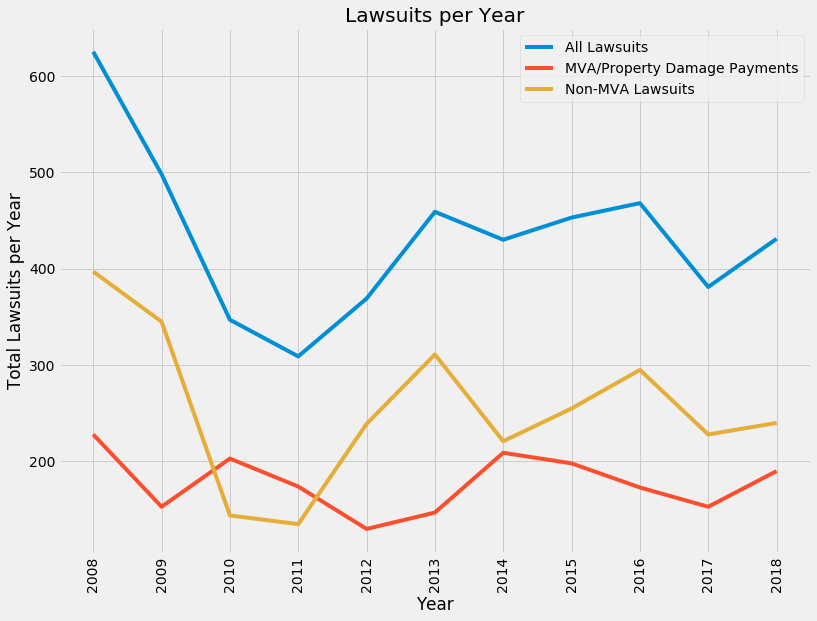

In [19]:
plots.plot(police_count_by_year['Year'], police_count_by_year['Payee'])
plots.plot(policeMVA_count_by_year['Year'], policeMVA_count_by_year['Total Paid(millions)'])
plots.plot(policenonMVA_count_by_year['Year'], policenonMVA_count_by_year['Total Paid(millions)'])

plots.xticks(np.arange(2008, 2019, step=1))
#plots.yticks(np.arange(.25, 1, step=.25))
plots.xticks(rotation = 90)
plots.title('Lawsuits per Year')
plots.xlabel('Year')
plots.ylabel('Total Lawsuits per Year')
plots.legend(loc = 'upper right')
mylabels = ['All Lawsuits', 'MVA/Property Damage Payments', 'Non-MVA Lawsuits']
plots.legend(labels=mylabels)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022627CA66D8>]],
      dtype=object)

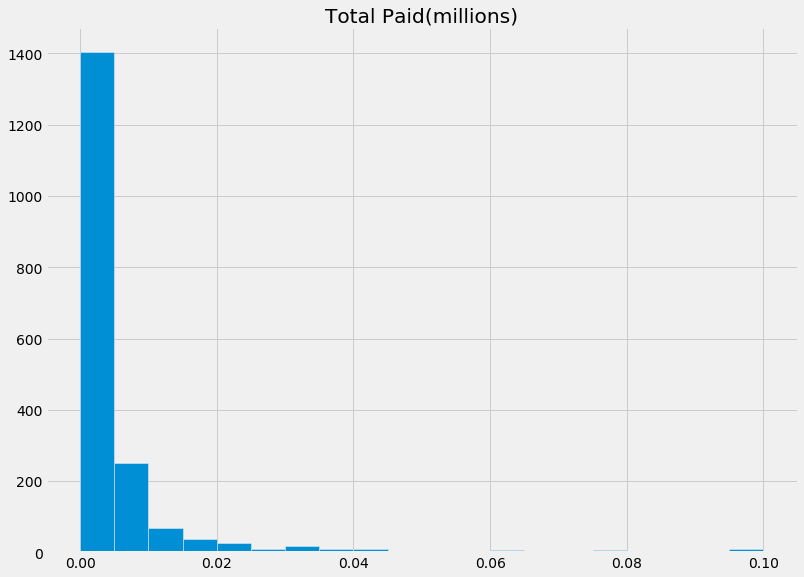

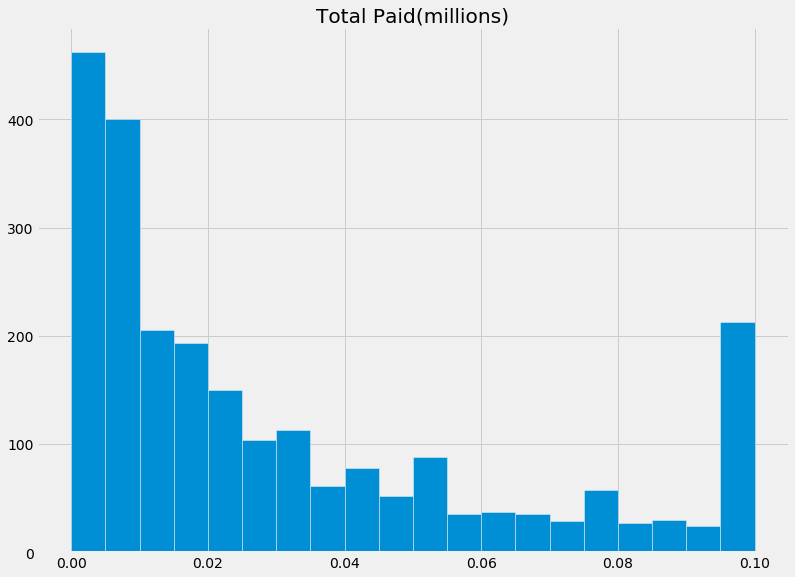

In [20]:
police_total_MVA.hist(column=['Total Paid(millions)'], bins=20, range=(0,0.1))
police_total_nonMVA.hist(column=['Total Paid(millions)'], bins=20, range=(0,0.1))